### KDE - CA Earthquakes
Draft, pattyf@berkeley.edu, 11/19/2015

This notebook uses the seaborn library to create a KDE (kernel density estimation) surface of earthquake density in California. This is overlayed on a vector representation of CA Counties to provide geographic context. This is a test based on the seaborn KDE example code and Geoff Boeing's code for plotting projected polygon data at: 
https://github.com/gboeing/2014-summer-travels/blob/master/trip-visualization-projected.ipynb


In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
#from time import time
from shapely.geometry import Polygon, Point
from geopy.distance import great_circle
from geopandas import GeoDataFrame
from descartes import PolygonPatch
import seaborn as sns

sns.set(style="darkgrid")



In [2]:
# Read in the earthquake data
# Source: http://earthquake.usgs.gov/earthquakes/feed/v1.0/
# http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv
# The csv above is all earthquakes all over world for last month. What I use below is a CA subset.
# It would be great to fetch a CA subset using the API/web service linked above.
# If we can't do that it would be good to subset the data in python (in this notebook) within the bounds of CA
# longitude > -124 & longitude < -114.15 & latitude > 32 & lat < 42.5

j = pd.read_csv('./data/ca_quakes2csv.csv')



In [3]:
# look at the earthquake data
print(j[1:10])

               X              Y                      time   latitude  \
1  104053.599025  -45990.441702  2015-10-05T07:51:02.480Z  37.596832   
2  233366.522807 -418254.575723  2015-10-05T06:14:41.750Z  34.223500   
3  308937.087767 -490465.143896  2015-10-05T05:56:00.430Z  33.551667   
4  308392.216236 -444195.345458  2015-10-05T05:30:34.380Z  33.968833   
5  318321.144814 -443840.041489  2015-10-05T05:02:39.490Z  33.968833   
6   18870.581043  417338.491041  2015-10-05T04:41:49.712Z  41.773500   
7  265303.174295 -437043.175960  2015-10-05T04:11:39.150Z  34.046000   
8  353373.681341 -520058.217238  2015-10-05T02:11:26.600Z  33.269833   
9 -236989.119557   88226.461037  2015-10-05T01:58:29.130Z  38.779335   

    longitude  depth   mag magType  nst    gap     dmin    rms net  \
1 -118.819832   6.26  1.29      md   15   73.0  0.01002  0.050  nc   
2 -117.466500  10.23  0.62      ml   13   84.0  0.05893  0.150  ci   
3 -116.674167  17.28  0.74      ml   12  218.0  0.02188  0.130  ci   

In [4]:
## This  is the code for the SEABORN KDE - but it needs work bc it assumes a side by side plot
# this could be used to show two different KDEs using different bandwidths

# Set up the figure - this is two figs!
#f, ax = plt.subplots(figsize=(8, 8))
#ax.set_aspect("equal")
#

#ax = fig.add_subplot(111)
#ax.set_axis_bgcolor(backgroundcolor)

# Draw the two density plots
# slow I think bc number of data points
#ax = sns.kdeplot(j.X, j.Y, bw=30000,
#                 cmap="Reds", shade=True, shade_lowest=False)
#fig = plt.figure(figsize=(8, 8))
#plt.show()
# why is plot window 2 hiding under plot window 1?

In [5]:
# specify the fonts and background color for our map
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
backgroundcolor = '#e4f4ff'

In [6]:
#from geopandas import GeoDataFrame
cal = GeoDataFrame.from_file('./data/CaliforniaCounties.shp')


In [7]:
#plot bounds
xlim = (cal.bounds['minx'].min(), cal.bounds['maxx'].max())
ylim = (cal.bounds['miny'].min(), cal.bounds['maxy'].max())


# create a rectangle from these coordinates
spatial_extent = Polygon([(xlim[0], ylim[0]), 
                       (xlim[0], ylim[1]), 
                       (xlim[1], ylim[1]),
                       (xlim[1], ylim[0])])

In [8]:
# set dimensions in inches for the plotting figure size
xdim = (xlim[1] - xlim[0]) / 400000
ydim = (ylim[1] - ylim[0]) / 400000

In [9]:
#from shapely.geometry import Polygon, Point
#from descartes import PolygonPatch
def get_patches(polys):
 
    facecolor = '#f7f7f7'
    edgecolor = '#cccccc'
    patches = []
 
    for i, row in polys.iterrows():
        if type(row['geometry']) == Polygon:
            patch = PolygonPatch(row['geometry'], fc=facecolor, ec=edgecolor, zorder=0)
            patches.append(patch)
        else:
            for polygon in row['geometry']:
                fc = facecolor
                patch = PolygonPatch(polygon, fc=fc, ec=edgecolor, zorder=0)
                patches.append(patch)
    return patches

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


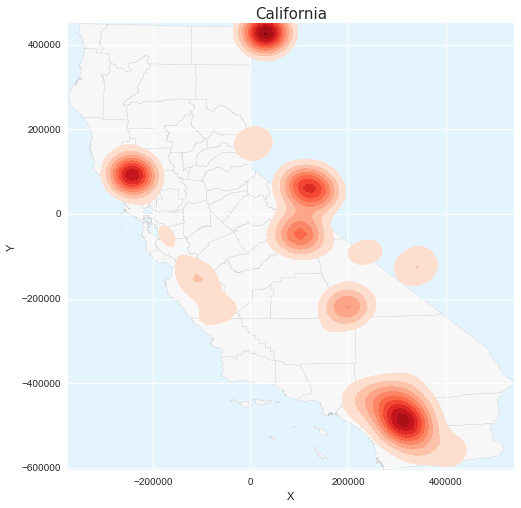

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_axis_bgcolor(backgroundcolor)

# add each patch we extracted from the GeoDataFrame's geometry column to the axis
#pstuff = get_patches(cal)
#ax.add_patch(pstuff)
for patch in get_patches(cal):
    ax.add_patch(patch)

# add the projected point data to the axis as a scatter plot
#points_scatter = ax.scatter(x=points['x'], y=points['y'], c='m', alpha=0.4, s=100)

ax.set_title('California', fontproperties=title_font)

# set the axes limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# remove the tickmarks as these are projected geometries, the ticks are confusing northings/eastings
#ax.set_xticks([])
#ax.set_yticks([])

# annotate the most visited cities on the map
#for i, row in most.iterrows():
#    plt.annotate(row['city'], 
#                 xy=(row['x'], row['y']),
#                 xytext=(row['x'] + 35000, row['y'] - 100000),
#                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.8),
#                 xycoords='data')
ax = sns.kdeplot(j.X, j.Y, bw=30000,
               cmap="Reds", shade=True, shade_lowest=False)
plt.show()

### Note:  The above works because the X,Y coords in the earthquake data are in the same projected coordinate system (EPSG:3310) as the counties.
This would be more useful if we: 

- fetch the data from the USGS website directly
- reproject the earthquake data to EPSG:3310
- then plot with the county data.


## Other plots we could make 

- first map: CA withearthquakes on the map
- second CA with KDE (what is done already)
- third CA with KDE with earthquake points
- four side by side CA with KDE using different bandwidths.
